In [2]:
import pickle
from sklearn.decomposition import PCA
from  sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

In [3]:
filenames = pickle.load(open('pickle/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('pickle/features-caltech101-resnet.pickle', 'rb'))

In [4]:
class_names = [os.path.basename(os.path.dirname(path)) for path in filenames]
class_name_to_id = {name: idx for idx, name in enumerate(sorted(set(class_names)))}
class_ids = [class_name_to_id[name] for name in class_names]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.001s...
[t-SNE] Computed neighbors for 4000 samples in 0.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.138761
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.561043
[t-SNE] KL divergence after 1000 iterations: 1.123965


/var/folders/lr/77q7001j7ts8dyg69j0vmc480000gn/T/ipykernel_11211/2081051535.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')


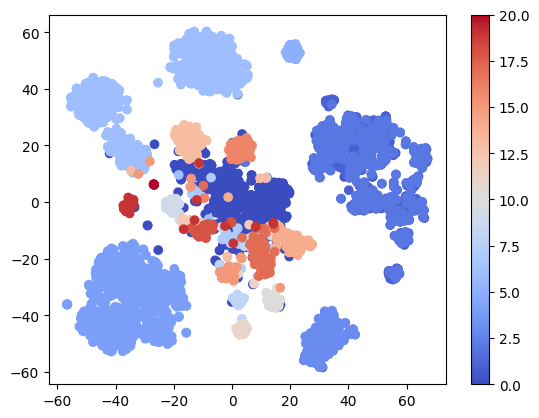

In [17]:
# Perform PCA over the features
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:4000]
selected_class_ids = class_ids[:4000]
selected_filenames = filenames[:4000]

tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1], c = selected_class_ids, cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()